In [34]:
import	pymysql
import	pandas	as	pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import numpy as np


In [35]:
conn = pymysql.connect(host='172.20.139.58', user='member2', password='1234',db='sqlteam4_db', charset = 'utf8')


In [36]:

cur1=conn.cursor(pymysql.cursors.DictCursor)
cur2=conn.cursor(pymysql.cursors.DictCursor)
cur3=conn.cursor(pymysql.cursors.DictCursor)

query = """
select area.city, 
y2015.taxifee as '2015',
y2016.taxifee as '2016', 
y2017.taxifee as '2017',
y2018.taxifee as '2018',
y2019.taxifee as '2019',
y2020.taxifee as '2020',
y2021.taxifee as '2021',
y2022.taxifee as '2022',
y2023.taxifee as '2023',
y2024.taxifee as '2024'
from area
inner join y2015 on area.city = y2015.city
inner join y2016 on area.city = y2016.city
inner join y2017 on area.city = y2017.city
inner join y2018 on area.city = y2018.city
inner join y2019 on area.city = y2019.city
inner join y2020 on area.city = y2020.city
inner join y2021 on area.city = y2021.city
inner join y2022 on area.city = y2022.city
inner join y2023 on area.city = y2023.city
inner join y2024 on area.city = y2024.city
where area.city in ('서울', '광주', '대구', '대전', '부산', '인천')"""

query2 = """
select area.city,
tax.ten_eleven,
tax.eleven_tw,
tax.tw_two,
tax.two_four, 
cpi.`2015`,
cpi.`2016`,
cpi.`2017`,
cpi.`2018`,
cpi.`2019`,
cpi.`2020`,
cpi.`2021`,
cpi.`2022`,
cpi.`2023`
from area
inner join 지역별택시할증 as tax on area.city = tax.city
inner join cpi on area.city = cpi.city
where area.city in ('서울', '광주', '대구', '대전', '부산', '인천')"""


query3 = """
select area.city,
y2023.taxifee as '2023',
y2024.taxifee as '2024',
cpi.`2022` as '2023 cpi',
cpi.`2023` as '2024 cpi'
from area
inner join y2023 on area.city = y2023.city
inner join y2024 on area.city = y2024.city
inner join cpi on area.city = cpi.city
where area.city in ('서울', '광주', '대구', '대전', '부산', '인천');
"""

cur1.execute(query)
cur2.execute(query2)
cur3.execute(query3)

rows1 = cur1.fetchall()
rows2 = cur2.fetchall()
rows3 = cur3.fetchall()


taxi_df=pd.DataFrame(rows1)
taxi_df2=pd.DataFrame(rows2)
taxi_df3=pd.DataFrame(rows3)

cur1.close()
cur2.close()
cur3.close()

conn.close()


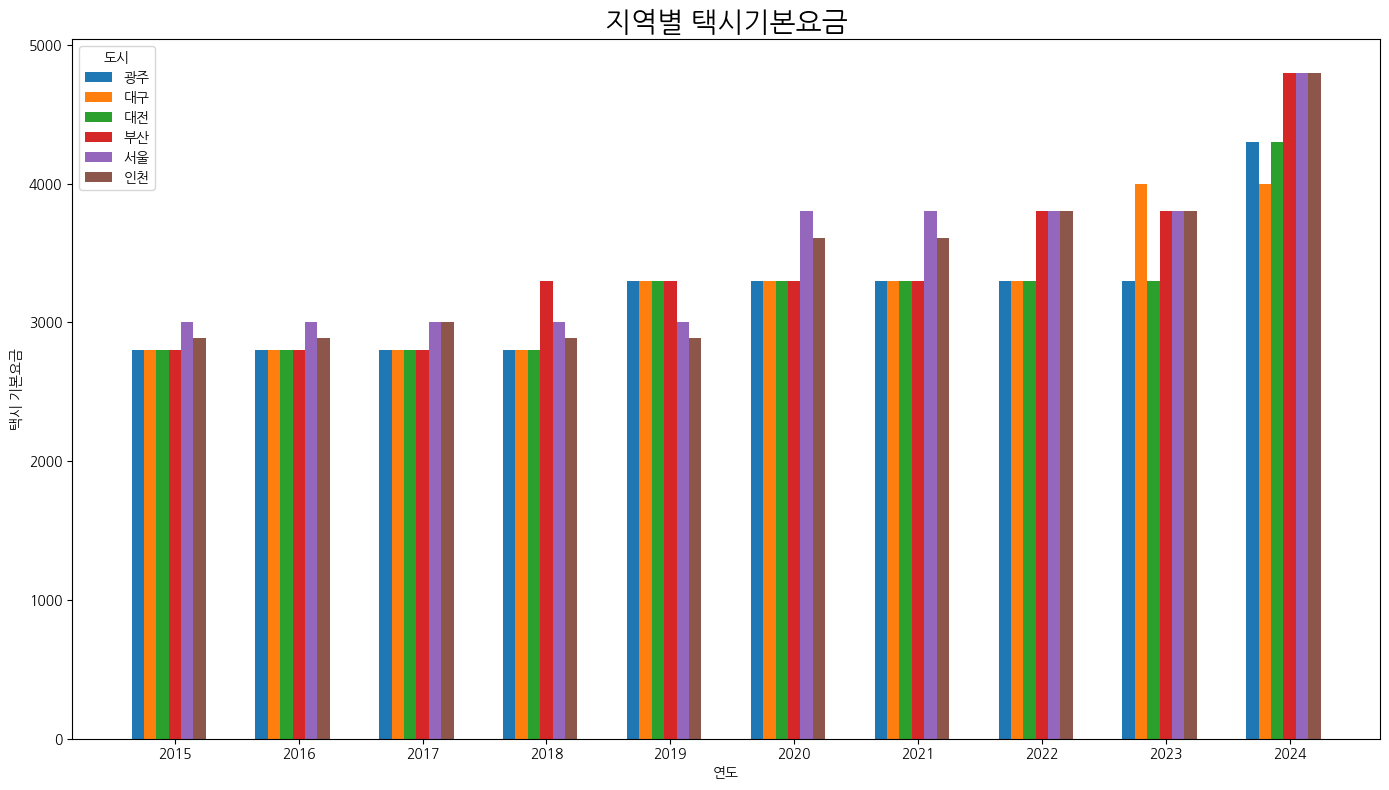

In [37]:

plt.figure(figsize=(14, 8))
bar_width = 0.1  # 막대의 너비
years = list(map(str, range(2015, 2025)))  # 연도 리스트
indices = np.arange(len(years))  # x축 인덱스

# 각 도시별로 막대 그래프 생성
for i, city in enumerate(taxi_df['city']):
    plt.bar(indices + bar_width * i, taxi_df.loc[i, years], bar_width, label=city)

plt.title('지역별 택시기본요금',fontsize=20)
plt.xlabel('연도')
plt.ylabel('택시 기본요금')
plt.xticks(indices + bar_width * (len(taxi_df['city']) / 2), years)  # x축 라벨 조정
plt.legend(title='도시')
plt.tight_layout()
plt.show()

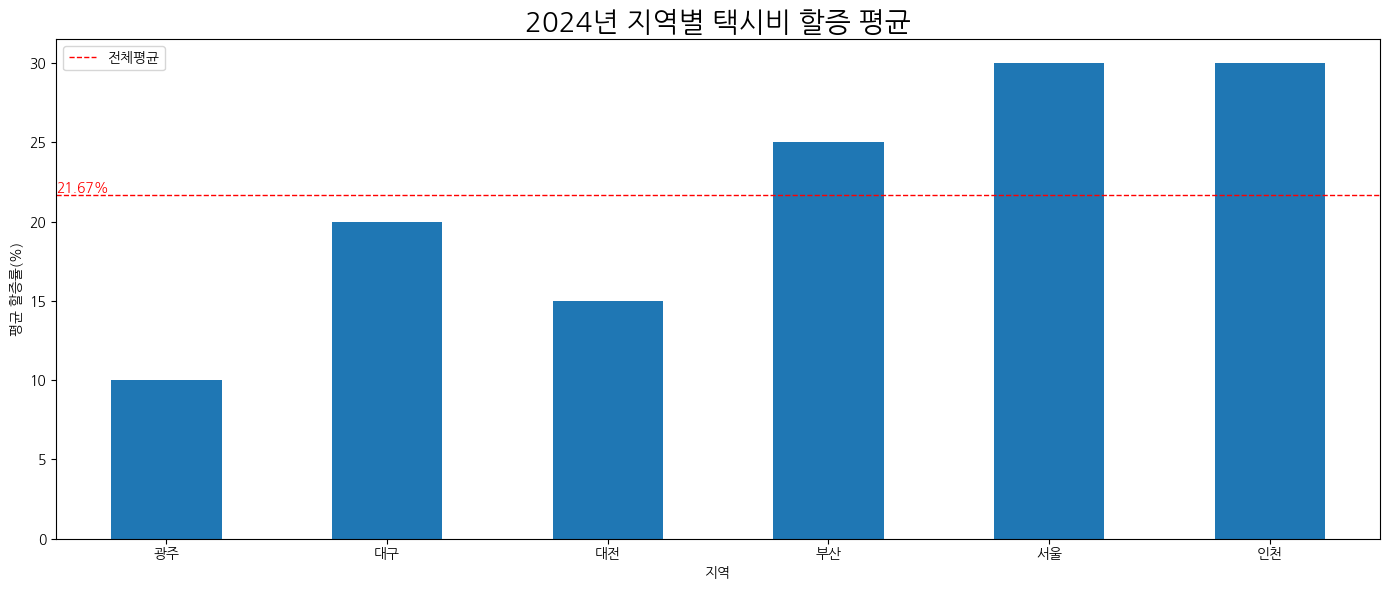

In [38]:
### 인천의 가격이 떨어졌다.
# 6개 지역 평균 할증률
for col in taxi_df2.columns[1:5]:
    taxi_df2[col] = taxi_df2[col].str.rstrip('%').astype(float)
selected_columns = taxi_df2[['city', 'ten_eleven', 'eleven_tw', 'tw_two', 'two_four']]

# 지역별 평균
average_values = selected_columns.set_index('city').mean(axis=1)
# 전체 평균
avg_all = average_values.mean()


plt.figure(figsize=(14, 6))
average_values.plot(kind='bar')


plt.title('2024년 지역별 택시비 할증 평균',fontsize=20)
plt.xlabel('지역')
plt.ylabel('평균 할증률(%)')
plt.text(-0.5, avg_all, f'{avg_all:.2f}%', color='red', verticalalignment='bottom')
plt.xticks(rotation=360)
plt.axhline(avg_all, color='red', linestyle='dashed', linewidth=1, label='전체평균')
plt.legend()
plt.tight_layout()
plt.show()

In [39]:
print(taxi_df3)

  city  2023  2024  2023 cpi  2024 cpi
0   광주  3300  4300    107.79    111.76
1   대구  4000  4000    108.02    111.79
2   대전  3300  4300    107.52    111.24
3   부산  3800  4800    107.35    111.33
4   서울  3800  4800    106.69    110.88
5   인천  3800  4800    107.96    111.92


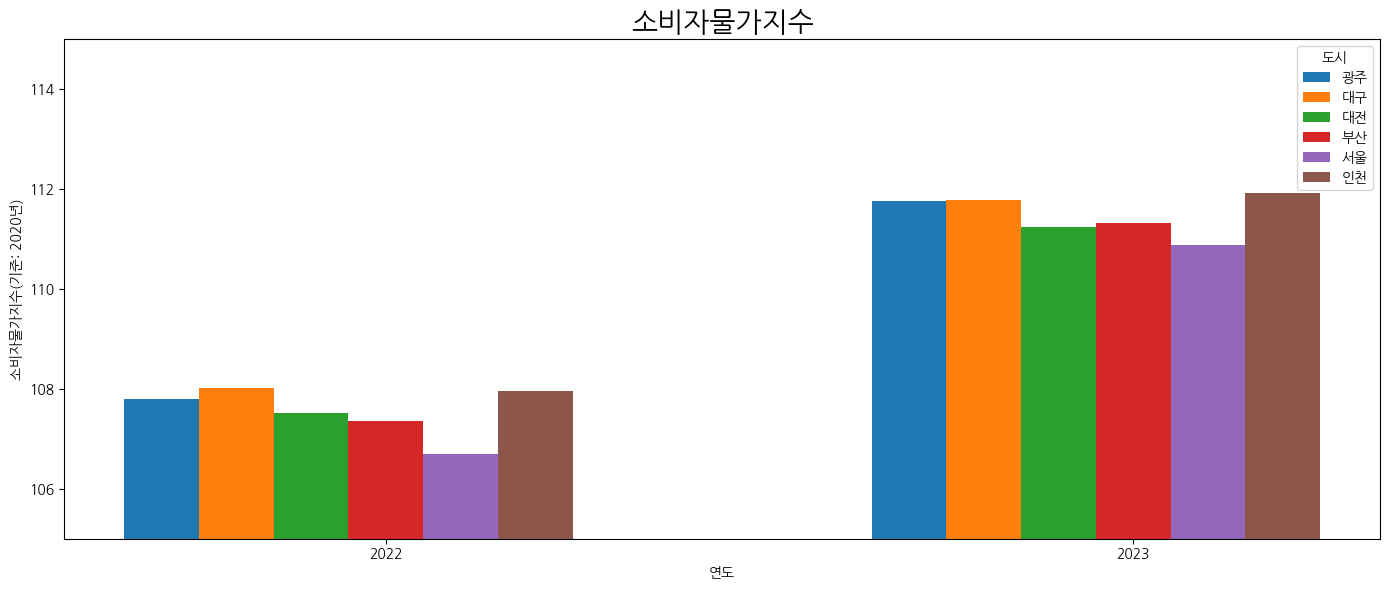

In [40]:
plt.figure(figsize=(14, 6))
bar_width = 0.1  # 막대의 너비
years = list(map(str, range(2022, 2024)))  # 연도 리스트
indices = np.arange(len(years))  # x축 인덱스

# 각 도시별로 막대 그래프 생성
for i, city in enumerate(taxi_df2['city']):
    plt.bar(indices + bar_width * i, taxi_df2.loc[i, years], bar_width, label=city)

plt.title('소비자물가지수', fontsize=20)
plt.xlabel('연도')
plt.ylabel('소비자물가지수(기준: 2020년)')
plt.xticks(indices + bar_width * (len(taxi_df2['city']) / 2), years)  # x축 라벨 조정
plt.legend(title='도시')
plt.ylim(105,115)
plt.tight_layout()
plt.show()

In [41]:
print(taxi_df3)

  city  2023  2024  2023 cpi  2024 cpi
0   광주  3300  4300    107.79    111.76
1   대구  4000  4000    108.02    111.79
2   대전  3300  4300    107.52    111.24
3   부산  3800  4800    107.35    111.33
4   서울  3800  4800    106.69    110.88
5   인천  3800  4800    107.96    111.92


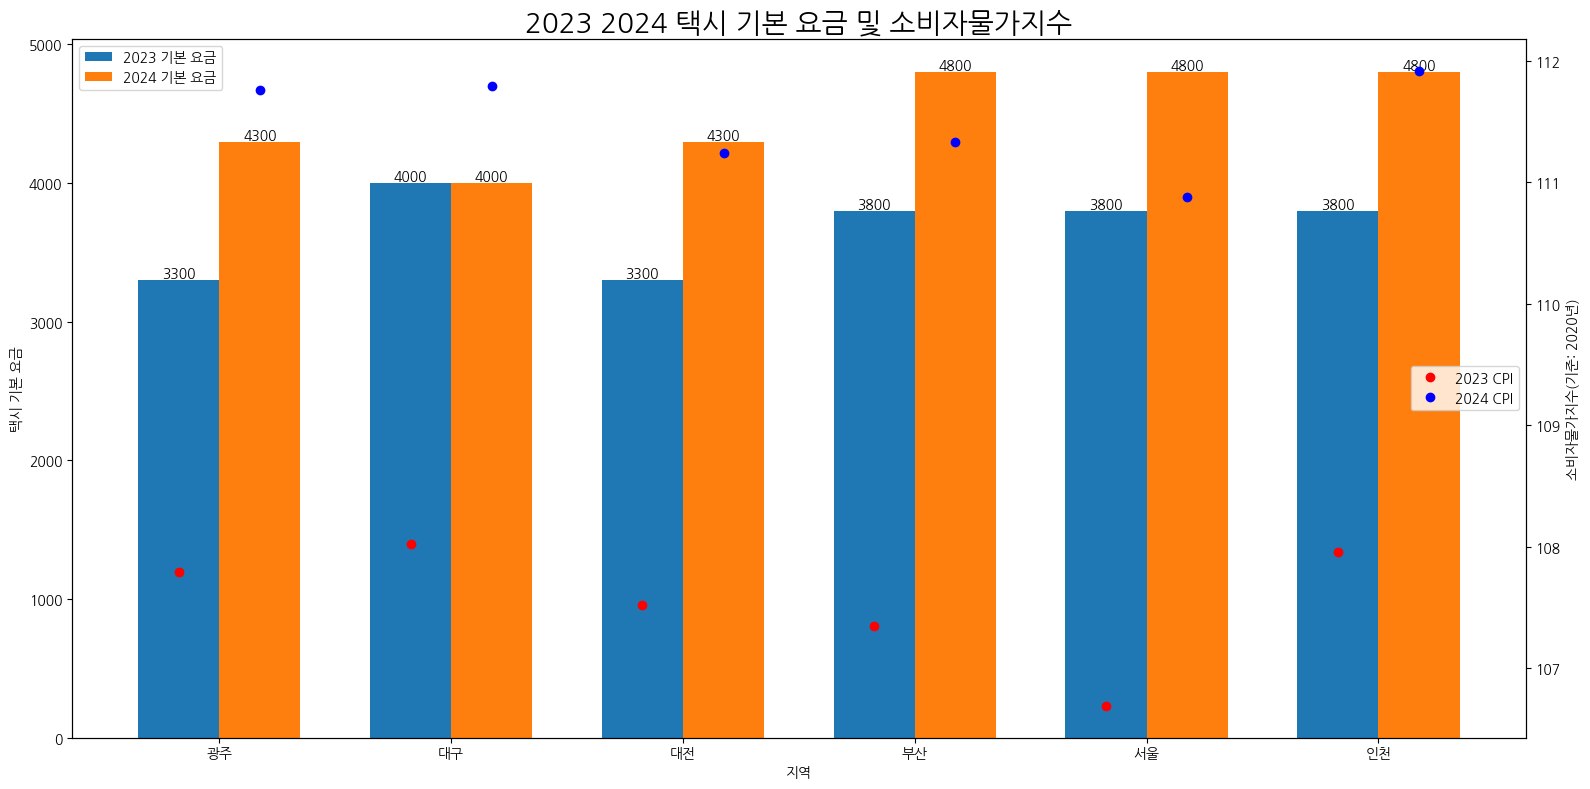

In [45]:
# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(16, 8))

bar_width = 0.35
index = np.arange(len(taxi_df3['city']))

# 기본 요금 막대 그래프
bars1 = ax1.bar(index - bar_width/2, taxi_df3['2023'], bar_width, label='2023 기본 요금')
bars2 = ax1.bar(index + bar_width/2, taxi_df3['2024'], bar_width, label='2024 기본 요금')

# 소비자물가지수 점 그래프
ax2 = ax1.twinx()
ax2.plot(index - bar_width/2, taxi_df3['2023 cpi'], color='red', marker='o', linestyle='None', label='2023 CPI')
ax2.plot(index + bar_width/2, taxi_df3['2024 cpi'], color='blue', marker='o', linestyle='None', label='2024 CPI')

# 각 막대 위에 값 표시
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# 그래프 레이아웃 설정
ax1.set_xlabel('지역')
ax1.set_ylabel('택시 기본 요금')
ax2.set_ylabel('소비자물가지수(기준: 2020년)')
ax1.set_title('2023 2024 택시 기본 요금 및 소비자물가지수', fontsize=20)
ax1.set_xticks(index)
ax1.set_xticklabels(taxi_df3['city'])
ax1.legend()
ax2.legend(loc='center right')

plt.tight_layout()
plt.show()